In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import glob
import cv2

In [3]:
path_apple_test = glob.glob('C:/Users/badia/Desktop/AI/Master 2/S3/DL/TP1/apple/test/*.png')
path_apple_train = glob.glob('C:/Users/badia/Desktop/AI/Master 2/S3/DL/TP1/apple/train/*.png')
path_lemon_test = glob.glob('C:/Users/badia/Desktop/AI/Master 2/S3/DL/TP1/lemon/test/*.png')
path_lemon_train = glob.glob('C:/Users/badia/Desktop/AI/Master 2/S3/DL/TP1/lemon/train/*.png')

In [4]:
X_train = []
y_train = []

for file in path_apple_train:
    img = cv2.imread(file)
    
    X_train.append(cv2.resize(img,(64,64)))
    #X_train.append(img)
    y_train.append(0)
    
for file in path_lemon_train :
    img = cv2.imread(file)
    X_train.append(cv2.resize(img,(64,64)))
    #X_train.append(img)
    y_train.append(1)
    
X_train  = np.array(X_train)
y_train= np.array(y_train)

In [5]:
X_test = []
y_test = []

for file in path_apple_test:
    img = cv2.imread(file)
    X_test.append(cv2.resize(img,(64,64)))
    #X_test.append(img)
    y_test.append(0)
    
for file in path_lemon_test :
    img = cv2.imread(file)
    X_test.append(cv2.resize(img,(64,64)))
    #X_test.append(img)
    y_test.append(1)
    
X_test  = np.array(X_test)
y_test = np.array(y_test)

In [6]:
print("the train sent contains ", len(X_train)," and the test contains ",len(X_test)," images")

the train sent contains  200  and the test contains  100  images


In [7]:
print("the size of each image is ", X_train[0].shape)

the size of each image is  (64, 64, 3)


In [8]:
X_train_gray = []
X_test_gray = []

for i in X_train:
    X_train_gray.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))
X_train_gray = np.array(X_train_gray)

for i in X_test:
    X_test_gray.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))
X_test_gray = np.array(X_test_gray)


In [9]:
#conveting ech image to 1d array than we normlize the pixels so they gonna be between 0 and 1
X_train_arr = []
X_test_arr = []

for i in X_train_gray:
    X_train_arr.append(i.reshape(-1))
X_train_arr = (np.array(X_train_arr)).T/255
#X_train_arr = (X_train_arr/255)

for i in X_test_gray:
    X_test_arr.append(i.reshape(-1))
X_test_arr = (np.array(X_test_arr)).T/255
#X_test_arr = (X_test_arr/255)



Question 1:

In [10]:
def RELU(x):
    return np.maximum(0,x)

def Sigmoid(x):
    return 1/(1+np.exp(-x))
    #return np.exp(x)/(np.exp(x)+1)

def d_RELU(x):
    #if (x>0).any(): return 1
    #else: return 0
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
def d_Sigmoid(x):
    return Sigmoid(x)*(1-Sigmoid(x))


In [29]:
#num of weights = neurons of 1st layer * neurons of newt layer.
#number of b = neurons of the next layer.

#for my model, i've chosen 1 layers: 1st with 200 and 2nd with 50
#initilizing weights and biases by 0

def initial_weigh (n,z=1):
    if(z==0):
        Ws1 = np.zeros((200,n)) 
        bs1 = np.zeros((200,1))
        Ws2 = np.zeros((1,200)) 
        bs2 = np.zeros(1)
    else:
        Ws1 = np.random.randn(200,n) 
        bs1 = np.random.randn(200,1)
        Ws2 = np.random.randn(1,200) 
        bs2 = np.random.randn(1)
    
    return Ws1,Ws2,bs1,bs2

In [30]:

def forword_pass_Relu(W1,W2,b1,b2,X):
    Z1 = W1 @ X +b1    #np.dot(W1,X) + b1
    A1 = RELU(Z1)
    Z2 = W2 @ A1 +b2   #np.dot(W2,A1) + b2
    A2 = RELU(Z2)
    return Z1,A1,Z2,A2
    
    
def forword_pass_Sigmoid(W1,W2,b1,b2,X):
    Z1 = W1 @ X + b1     #np.dot(W1,X) + b1   
    A1 = Sigmoid(Z1)
    Z2 = W2 @ A1 + b2    #np.dot(W2,A1) + b2
    A2 = Sigmoid(Z2)
    return Z1,A1,Z2,A2

In [31]:
X_train_arr.shape

(4096, 200)

Batch gradient descent

In [34]:

def bach_grediant_descent(X,y_true,epochs,act,z=1,lr=0.01):
    
    number_of_feature = X.shape[0]
    total_samples = X.shape[1]
    W1,W2,b1,b2 = initial_weigh(number_of_feature,z)
    
    coast_list = []
    epochs_list = []
    
    for i in range (epochs):
        print(i+1,'/',epochs)
        if(act=='Sigmoid'):
            z1,a1,z2,y_pred = forword_pass_Sigmoid(W1,W2,b1,b2,X)
        else:
            z1,a1,z2,y_pred = forword_pass_Relu(W1,W2,b1,b2,X)
        
        mse = (1/total_samples)*np.sum(((y_true-y_pred)**2))
        
        dmse_dpred = (-2/total_samples)*(y_true-y_pred)
        if(act=='Sigmoid'):
            dpred_dz2 = d_Sigmoid(z2)
        else:
            dpred_dz2 = d_RELU(z2)
            
        dz2_dw2 = a1
        dz2_db2 = np.ones(1)

        dmse_dw2 = ((dmse_dpred* dpred_dz2) @dz2_dw2.T)
        dmse_db2 = ((dmse_dpred@ dpred_dz2.T) @dz2_db2)
        
        dz2_da1 = W2*(np.transpose(a1))
        
        if(act=='Sigmoid'):
            da1_dz1 = d_Sigmoid(z1)
        else:
            da1_dz1 = d_RELU(z1)
            
        '''up_x = []
        for i in range(total_samples):
            up_x.append((X[:,i]*np.ones((200,1))))
        dz1_dw1 = np.array(up_x)
        #(np.array(up_x)).shape'''
        dz1_dw1 = X
        dz1_db1 = np.ones((1,200))
        
        dmse_dw1 = ((dmse_dpred.T@dpred_dz2@dz2_da1).T * da1_dz1@dz1_dw1.T)
        dmse_db1 = ((dmse_dpred.T@dpred_dz2@dz2_da1).T @ da1_dz1.T@dz1_db1.T)
        
        
        W1 -= lr*dmse_dw1
        W2 -= lr*dmse_dw2
        b1 -= lr*dmse_db1
        b2 -= lr*dmse_db2
        
        
        coast_list.append(mse)
        epochs_list.append(i)
        
        
    return W1,W2,b1,b2,np.array(coast_list),np.array(epochs_list)
        

In [35]:
#train the mpdel using Sigmoid
W1,W2,b1,b2,coasts,epochs = bach_grediant_descent(X_train_arr,y_train,200,'Sigmoid',z=0)


1 / 200
2 / 200
3 / 200
4 / 200
5 / 200
6 / 200
7 / 200
8 / 200
9 / 200
10 / 200
11 / 200
12 / 200
13 / 200
14 / 200
15 / 200
16 / 200
17 / 200
18 / 200
19 / 200
20 / 200
21 / 200
22 / 200
23 / 200
24 / 200
25 / 200
26 / 200
27 / 200
28 / 200
29 / 200
30 / 200
31 / 200
32 / 200
33 / 200
34 / 200
35 / 200
36 / 200
37 / 200
38 / 200
39 / 200
40 / 200
41 / 200
42 / 200
43 / 200
44 / 200
45 / 200
46 / 200
47 / 200
48 / 200
49 / 200
50 / 200
51 / 200
52 / 200
53 / 200
54 / 200
55 / 200
56 / 200
57 / 200
58 / 200
59 / 200
60 / 200
61 / 200
62 / 200
63 / 200
64 / 200
65 / 200
66 / 200
67 / 200
68 / 200
69 / 200
70 / 200
71 / 200
72 / 200
73 / 200
74 / 200
75 / 200
76 / 200
77 / 200
78 / 200
79 / 200
80 / 200
81 / 200
82 / 200
83 / 200
84 / 200
85 / 200
86 / 200
87 / 200
88 / 200
89 / 200
90 / 200
91 / 200
92 / 200
93 / 200
94 / 200
95 / 200
96 / 200
97 / 200
98 / 200
99 / 200
100 / 200
101 / 200
102 / 200
103 / 200
104 / 200
105 / 200
106 / 200
107 / 200
108 / 200
109 / 200
110 / 200
111 / 20

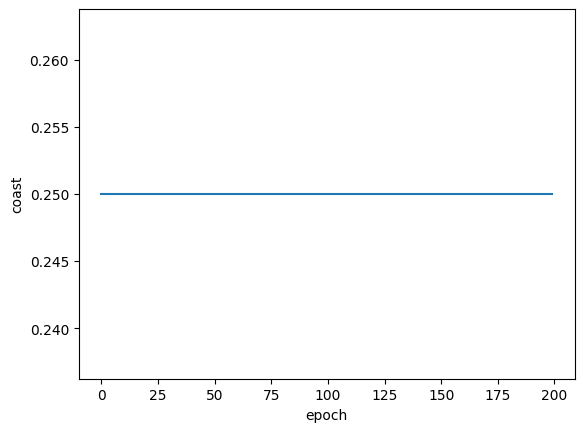

In [36]:
#epochs = 700
import matplotlib.pyplot as plt
plt.xlabel("epoch")
plt.ylabel("coast")
plt.plot(epochs,coasts)
#plt.plot(epochs,np.flip(coasts,0))

In [24]:
z1,a1,z2,y_pred=forword_pass_Sigmoid(W1,W2,b1,b2,X_test_arr)
y_pred = [1 if y>= 0.5 else 0 for y in y_pred[0]]
print("Confusion Matrix of the model : \n",confusion_matrix(y_test, y_pred))

Confusion Matrix of the model : 
 [[32 18]
 [10 40]]


In [18]:
#train the model using Relu as activation
W1,W2,b1,b2,coasts,epochs = bach_grediant_descent(X_train_arr,y_train,200,'Relu')
#y_pred= [1 if y>= 0.5 else 0 for y in y_pred[0]]

1 / 200
2 / 200
3 / 200
4 / 200
5 / 200
6 / 200
7 / 200
8 / 200
9 / 200
10 / 200
11 / 200
12 / 200
13 / 200
14 / 200
15 / 200
16 / 200
17 / 200
18 / 200
19 / 200
20 / 200
21 / 200
22 / 200
23 / 200
24 / 200
25 / 200
26 / 200
27 / 200
28 / 200
29 / 200
30 / 200
31 / 200
32 / 200
33 / 200
34 / 200
35 / 200
36 / 200
37 / 200
38 / 200
39 / 200
40 / 200
41 / 200
42 / 200
43 / 200
44 / 200
45 / 200
46 / 200
47 / 200
48 / 200
49 / 200
50 / 200
51 / 200
52 / 200
53 / 200
54 / 200
55 / 200
56 / 200
57 / 200
58 / 200
59 / 200
60 / 200
61 / 200
62 / 200
63 / 200
64 / 200
65 / 200
66 / 200
67 / 200
68 / 200
69 / 200
70 / 200
71 / 200
72 / 200
73 / 200
74 / 200
75 / 200
76 / 200
77 / 200
78 / 200
79 / 200
80 / 200
81 / 200
82 / 200
83 / 200
84 / 200
85 / 200
86 / 200
87 / 200
88 / 200
89 / 200
90 / 200
91 / 200
92 / 200
93 / 200
94 / 200
95 / 200
96 / 200
97 / 200
98 / 200
99 / 200
100 / 200
101 / 200
102 / 200
103 / 200
104 / 200
105 / 200
106 / 200
107 / 200
108 / 200
109 / 200
110 / 200
111 / 20

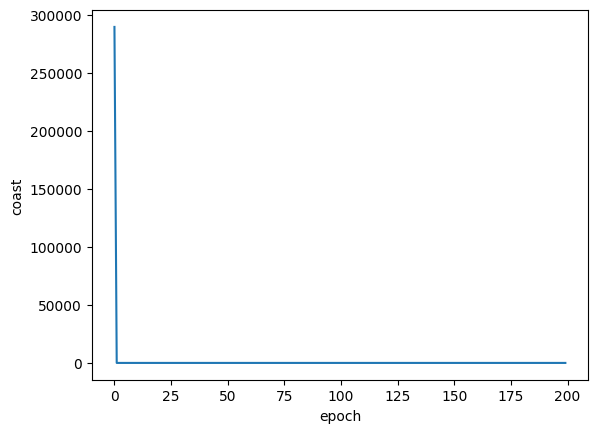

In [19]:
plt.xlabel("epoch")
plt.ylabel("coast")
plt.plot(epochs,coasts)

In [20]:
z1,a1,z2,y_pred=forword_pass_Relu(W1,W2,b1,b2,X_test_arr)
y_pred = [1 if y>= 0.5 else 0 for y in y_pred[0]]
print("Confusion Matrix of the model : \n",confusion_matrix(y_test, y_pred))

Confusion Matrix of the model : 
 [[50  0]
 [50  0]]


mini batch greadiant descent

In [25]:
def create_mini_batches(data, y, batch_size=50):
    mini_batches_x = []
    mini_batches_y = []
    n_minibatches = data.shape[1] // batch_size
    i = 0
    for i in range (n_minibatches+1):
        mini_batch_x = data[:,i*batch_size:(i+1)*batch_size]
        mini_batch_y = y[i*batch_size:(i+1)*batch_size]
        mini_batches_x.append(mini_batch_x)
        mini_batches_y.append(mini_batch_y)
        
        
    if data.shape[1] % batch_size != 0:
        mini_batch_x = data[i * batch_size:data.shape[1]]
        mini_batch_y = y[i * batch_size:y.shape[1]]
        X_mini = mini_batch_x[:, :-1]
        Y_mini = mini_batch_y[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches_x[0:-1],mini_batches_y[0:-1]

In [26]:
mini_x,mini_y = create_mini_batches(X_train_arr, y_train)
mini_x[0].shape

(4096, 50)

In [27]:
def minibach_grediant_descent(X,y_true,epochs,act,z=1,lr=0.01):
    
    number_of_feature = X.shape[0]
    total_samples = X.shape[1]
    
    mini_x,mini_y = create_mini_batches(X, y_true)
    coast_list = []
    epochs_list = []
    W1,W2,b1,b2 = initial_weigh(number_of_feature,z)
    
    for i in range (epochs):
        print(i+1,'/',epochs)
        a = []
        for j in range(len(mini_x)):
            n=mini_x[j].shape[1]
            if(act=='Sigmoid'):
                z1,a1,z2,y_pred = forword_pass_Sigmoid(W1,W2,b1,b2,mini_x[j])
            else:
                z1,a1,z2,y_pred = forword_pass_Relu(W1,W2,b1,b2,mini_x[j])
            a.append((mini_y[j]-y_pred)**2)
            

            dmse_dpred = (-2/n)*(mini_y[j]-y_pred)
            if(act=='Sigmoid'):
                dpred_dz2 = d_Sigmoid(z2)
            else:
                dpred_dz2 = d_RELU(z2)
            dz2_dw2 = a1
            dz2_db2 = np.ones(1)
            
            dmse_dw2 = ((dmse_dpred* dpred_dz2) @dz2_dw2.T)
            dmse_db2 = ((dmse_dpred@ dpred_dz2.T) @dz2_db2)


            dz2_da1 =W2*(np.transpose(a1))
            if(act=='Sigmoid'):
                da1_dz1 = d_Sigmoid(z1)
            else:
                da1_dz1 = d_RELU(z1)
            
            dz1_dw1 = mini_x[j]
            dz1_db1 = np.ones((1,200))
            
            
            dmse_dw1 = ((dmse_dpred.T@dpred_dz2@dz2_da1).T * da1_dz1@dz1_dw1.T)
            dmse_db1 = ((dmse_dpred.T@dpred_dz2@dz2_da1).T @ da1_dz1.T@dz1_db1.T)


            W1 -= lr*dmse_dw1
            W2 -= lr*dmse_dw2
            b1 -= lr*dmse_db1
            b2 -= lr*dz2_db2
        
            
        
        coast_list.append((1/total_samples)*np.sum(a))
        epochs_list.append(i)
        
    return W1,W2,b1,b2,np.array(coast_list),np.array(epochs_list)
        

In [32]:
#train the model using sigmoid
w1,w2,b1,b2,coast,epochs = minibach_grediant_descent(X_train_arr,y_train,200,'Sigmoid')


1 / 200
2 / 200
3 / 200
4 / 200
5 / 200
6 / 200
7 / 200
8 / 200
9 / 200
10 / 200
11 / 200
12 / 200
13 / 200
14 / 200
15 / 200
16 / 200
17 / 200
18 / 200
19 / 200
20 / 200
21 / 200
22 / 200
23 / 200
24 / 200
25 / 200
26 / 200
27 / 200
28 / 200
29 / 200
30 / 200
31 / 200
32 / 200
33 / 200
34 / 200
35 / 200
36 / 200
37 / 200
38 / 200
39 / 200
40 / 200
41 / 200
42 / 200
43 / 200
44 / 200
45 / 200
46 / 200
47 / 200
48 / 200
49 / 200
50 / 200
51 / 200
52 / 200
53 / 200
54 / 200
55 / 200
56 / 200
57 / 200
58 / 200
59 / 200
60 / 200
61 / 200
62 / 200
63 / 200
64 / 200
65 / 200
66 / 200
67 / 200
68 / 200
69 / 200
70 / 200
71 / 200
72 / 200
73 / 200
74 / 200
75 / 200
76 / 200
77 / 200
78 / 200
79 / 200
80 / 200
81 / 200
82 / 200
83 / 200
84 / 200
85 / 200
86 / 200
87 / 200
88 / 200
89 / 200
90 / 200
91 / 200
92 / 200
93 / 200
94 / 200
95 / 200
96 / 200
97 / 200
98 / 200
99 / 200
100 / 200
101 / 200
102 / 200
103 / 200
104 / 200
105 / 200
106 / 200
107 / 200
108 / 200
109 / 200
110 / 200
111 / 20

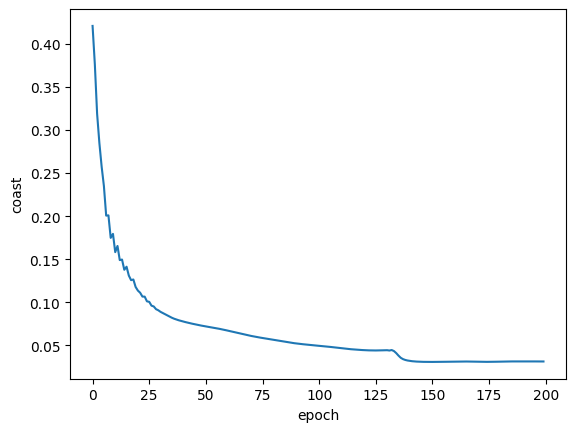

In [33]:
plt.xlabel("epoch")
plt.ylabel("coast")
plt.plot(epochs,coast)

In [34]:
z1,a1,z2,y_pred=forword_pass_Sigmoid(W1,W2,b1,b2,X_test_arr)
#y_pred[0]
y_pred = [1 if y>= 0.5 else 0 for y in y_pred[0]]
print("Confusion Matrix of the model : \n",confusion_matrix(y_test, y_pred))

Confusion Matrix of the model : 
 [[50  0]
 [50  0]]


1 / 200
2 / 200
3 / 200
4 / 200
5 / 200
6 / 200
7 / 200
8 / 200
9 / 200
10 / 200
11 / 200
12 / 200
13 / 200
14 / 200
15 / 200
16 / 200
17 / 200
18 / 200
19 / 200
20 / 200
21 / 200
22 / 200
23 / 200
24 / 200
25 / 200
26 / 200
27 / 200
28 / 200
29 / 200
30 / 200
31 / 200
32 / 200
33 / 200
34 / 200
35 / 200
36 / 200
37 / 200
38 / 200
39 / 200
40 / 200
41 / 200
42 / 200
43 / 200
44 / 200
45 / 200
46 / 200
47 / 200
48 / 200
49 / 200
50 / 200
51 / 200
52 / 200
53 / 200
54 / 200
55 / 200
56 / 200
57 / 200
58 / 200
59 / 200
60 / 200
61 / 200
62 / 200
63 / 200
64 / 200
65 / 200
66 / 200
67 / 200
68 / 200
69 / 200
70 / 200
71 / 200
72 / 200
73 / 200
74 / 200
75 / 200
76 / 200
77 / 200
78 / 200
79 / 200
80 / 200
81 / 200
82 / 200
83 / 200
84 / 200
85 / 200
86 / 200
87 / 200
88 / 200
89 / 200
90 / 200
91 / 200
92 / 200
93 / 200
94 / 200
95 / 200
96 / 200
97 / 200
98 / 200
99 / 200
100 / 200
101 / 200
102 / 200
103 / 200
104 / 200
105 / 200
106 / 200
107 / 200
108 / 200
109 / 200
110 / 200
111 / 20

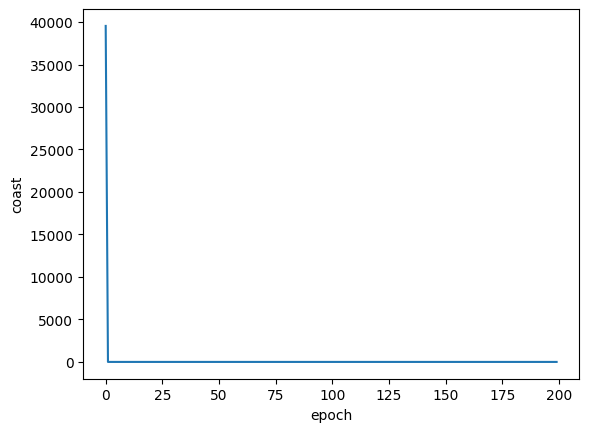

In [35]:
#train the model using relu
w1,w2,b1,b2,coast,epochs = minibach_grediant_descent(X_train_arr,y_train,200,'Relu')
plt.xlabel("epoch")
plt.ylabel("coast")
plt.plot(epochs,coast)

In [36]:
z1,a1,z2,y_pred=forword_pass_Sigmoid(W1,W2,b1,b2,X_test_arr)
y_pred = [0 if y<=0.5 else 1 for y in y_pred[0]]
print("Confusion Matrix of the model : \n",confusion_matrix(y_test, y_pred))

Confusion Matrix of the model : 
 [[50  0]
 [50  0]]


C:\Users\badia\AppData\Local\Temp\ipykernel_19548\2714802600.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Stocastic grediant descent

In [74]:
def SGD(x,y_true,epochs,act,z=1,lr=0.01):
    
    number_of_feature,total_samples = x.shape
    
    W1,W2,b1,b2 = initial_weigh(number_of_feature,z)
    
    coast_list = []
    epoch_list = []
    mse = []
    for i in range(epochs):
        print(i+1,'/',epochs)
        random_index = np.random.randint(0,total_samples -1)
        sample_x = np.expand_dims(x[:,random_index], axis=-1)
        sample_y = y_true[random_index]
        
        #Forward Propagation
        
        if (act == 'Sigmoid'):
            z1,a1,z2,y_pred = forword_pass_Sigmoid(W1,W2,b1,b2,sample_x)
            ny = forword_pass_Sigmoid(W1,W2,b1,b2,x)[3]
            mse = (y_true-ny)**2
        else:
            z1,a1,z2,y_pred = forword_pass_Relu(W1,W2,b1,b2,sample_x)
            ny = forword_pass_Relu(W1,W2,b1,b2,x)[3]
            mse = (y_true-ny)**2
            
        # Calculate MSE
        
        #mse.append((sample_y - y_pred[0,0])**2)
        
        #Backward Propagation
        
        dmse_dpred = np.array([[(-2)*(sample_y - y_pred[0][0])]])
        if (act == 'Sigmoid'):
            dpred_dz2 = d_Sigmoid(z2)
        else:
            dpred_dz2 = d_RELU(z2)
            
        dz2_dw2 = a1
        dz2_db2 = np.ones(1)
        
        dmse_dw2 = (dz2_dw2 @ dpred_dz2 @ dmse_dpred).T
        dmse_db2 = (dz2_db2 @ dpred_dz2 @ dmse_dpred).T
        
            
        dz2_da1 =W2*(np.transpose(a1))
        if (act == 'Sigmoid' ):
            da1_dz1 = d_Sigmoid(z1)
        else:
            da1_dz1 = d_RELU(z1)

        dz1_dw1 = sample_x
        dz1_db1 = np.array([np.ones(200)])
         
        
        dmse_dw1 = (((dmse_dpred@dpred_dz2@dz2_da1).T*da1_dz1)@dz1_dw1.T)
        dmse_db1 = ((dmse_dpred@dpred_dz2@dz2_da1).T* da1_dz1*dz1_db1.T)
        
        
        W1 = W1 - lr* dmse_dw1
        W2 = W2 - lr* dmse_dw2
        b1 = b1 - lr* dmse_db1
        b2 = b2 - lr* dmse_db2
        
        coast_list.append((1/total_samples)*np.sum(mse))
        epoch_list.append(i)
        
    return W1, W2, b1 ,b2, np.array(coast_list), np.array(epoch_list)


1 / 200
2 / 200
3 / 200
4 / 200
5 / 200
6 / 200
7 / 200
8 / 200
9 / 200
10 / 200
11 / 200
12 / 200
13 / 200
14 / 200
15 / 200
16 / 200
17 / 200
18 / 200
19 / 200
20 / 200
21 / 200
22 / 200
23 / 200
24 / 200
25 / 200
26 / 200
27 / 200
28 / 200
29 / 200
30 / 200
31 / 200
32 / 200
33 / 200
34 / 200
35 / 200
36 / 200
37 / 200
38 / 200
39 / 200
40 / 200
41 / 200
42 / 200
43 / 200
44 / 200
45 / 200
46 / 200
47 / 200
48 / 200
49 / 200
50 / 200
51 / 200
52 / 200
53 / 200
54 / 200
55 / 200
56 / 200
57 / 200
58 / 200
59 / 200
60 / 200
61 / 200
62 / 200
63 / 200
64 / 200
65 / 200
66 / 200
67 / 200
68 / 200
69 / 200
70 / 200
71 / 200
72 / 200
73 / 200
74 / 200
75 / 200
76 / 200
77 / 200
78 / 200
79 / 200
80 / 200
81 / 200
82 / 200
83 / 200
84 / 200
85 / 200
86 / 200
87 / 200
88 / 200
89 / 200
90 / 200
91 / 200
92 / 200
93 / 200
94 / 200
95 / 200
96 / 200
97 / 200
98 / 200
99 / 200
100 / 200
101 / 200
102 / 200
103 / 200
104 / 200
105 / 200
106 / 200
107 / 200
108 / 200
109 / 200
110 / 200
111 / 20

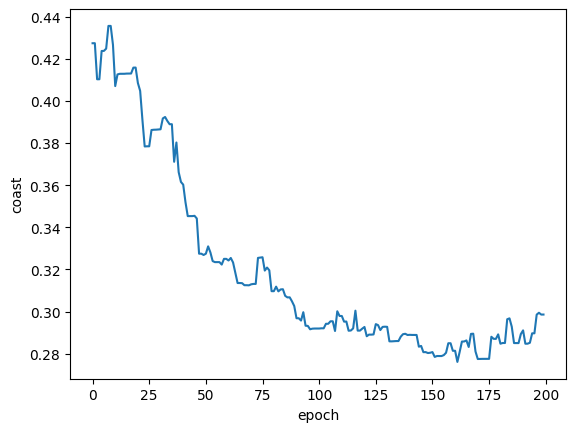

In [75]:
w1,w2,b1,b2,coast,epochs = SGD(X_train_arr,y_train,200,'Sigmoid')
plt.xlabel("epoch")
plt.ylabel("coast")
plt.plot(epochs,coast)

In [77]:
z1,a1,z2,y_pred=forword_pass_Sigmoid(W1,W2,b1,b2,X_test_arr)
y_pred = [0 if y<=0.5 else 1 for y in y_pred[0]]
print("Confusion Matrix of the model : \n",confusion_matrix(y_test, y_pred))

Confusion Matrix of the model : 
 [[29 21]
 [ 7 43]]


1 / 200
2 / 200
3 / 200
4 / 200
5 / 200
6 / 200
7 / 200
8 / 200
9 / 200
10 / 200
11 / 200
12 / 200
13 / 200
14 / 200
15 / 200
16 / 200
17 / 200
18 / 200
19 / 200
20 / 200
21 / 200
22 / 200
23 / 200
24 / 200
25 / 200
26 / 200
27 / 200
28 / 200
29 / 200
30 / 200
31 / 200
32 / 200
33 / 200
34 / 200
35 / 200
36 / 200
37 / 200
38 / 200
39 / 200
40 / 200
41 / 200
42 / 200
43 / 200
44 / 200
45 / 200
46 / 200
47 / 200
48 / 200
49 / 200
50 / 200
51 / 200
52 / 200
53 / 200
54 / 200
55 / 200
56 / 200
57 / 200
58 / 200
59 / 200
60 / 200
61 / 200
62 / 200
63 / 200
64 / 200
65 / 200
66 / 200
67 / 200
68 / 200
69 / 200
70 / 200
71 / 200
72 / 200
73 / 200
74 / 200
75 / 200
76 / 200
77 / 200
78 / 200
79 / 200
80 / 200
81 / 200
82 / 200
83 / 200
84 / 200
85 / 200
86 / 200
87 / 200
88 / 200
89 / 200
90 / 200
91 / 200
92 / 200
93 / 200
94 / 200
95 / 200
96 / 200
97 / 200
98 / 200
99 / 200
100 / 200
101 / 200
102 / 200
103 / 200
104 / 200
105 / 200
106 / 200
107 / 200
108 / 200
109 / 200
110 / 200
111 / 20

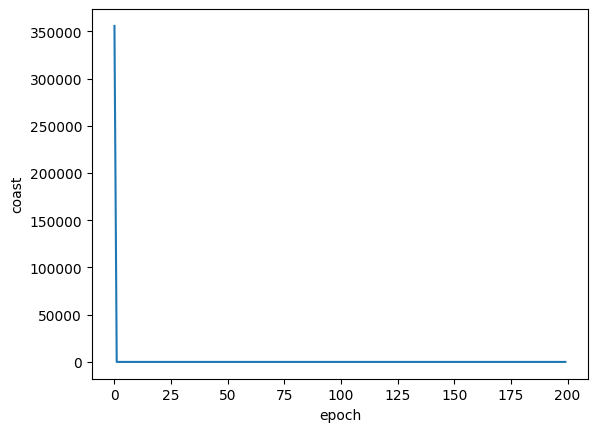

In [78]:
w1,w2,b1,b2,coast,epochs = SGD(X_train_arr,y_train,200,'Relu')
plt.xlabel("epoch")
plt.ylabel("coast")
plt.plot(epochs,coast)

In [79]:
z1,a1,z2,y_pred=forword_pass_Relu(W1,W2,b1,b2,X_test_arr)
y_pred = [0 if y<=0.5 else 1 for y in y_pred[0]]
print("Confusion Matrix of the model : \n",confusion_matrix(y_test, y_pred))

Confusion Matrix of the model : 
 [[50  0]
 [50  0]]


In [ ]:
#from tensorflow import keras
#import tensorflow as tf
#from tensorflow.keras.models import Sequential, load_model
#from tensorflow.keras.layers import Dense,Dropout
#from sklearn.metrics import accuracy_score

In [ ]:
#tf.keras.backend.clear_session()
#model = Sequential()

#model.add(Dense(units=200, activation='sigmoid', input_dim=4096))

#model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
#model.summary()

In [ ]:
#model.compile(optimizer="SGD",
#              loss='mse',
#              metrics = ['accuracy'])

In [ ]:
#model.fit(X_train_arr.T, y_train,batch_size=200, epochs=200)

In [ ]:
#y_hat = model.predict(X_test_arr.T)

In [ ]:
#model.evaluate(X_test_arr.T, y_test)